In [7]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
np.random.seed(42)

In [13]:
DATA_DIR = "../../../data/"

In [14]:
file_path =  DATA_DIR + 'Brunel_BdJPsiKs_MagU_30k.h5'

In [16]:
seed_data = pd.read_hdf(file_path, 'table')

In [17]:
seed_data.head()

,has_MCParticle,is_downstream_reconstructible,has_MCParticle_not_electron,is_downstream_reconstructible_not_electron,is_true_seed,seed_chi2PerDoF,seed_p,seed_pt,seed_nLHCbIDs,seed_nbIT,seed_nLayers,seed_x,seed_y,seed_tx,seed_ty,seed_mva_value
0,True,False,True,False,False,1.447929,1849.101146,1083.522737,27,0,12,-1418.736880,-143.095899,-0.722093,-0.038671,0.039982
1,True,True,True,True,False,0.354945,10085.622823,1345.148537,24,0,12,-393.699553,-284.193871,-0.129122,-0.037920,0.801061
2,True,True,True,True,True,2.906524,2441.534682,1013.888408,24,0,12,-834.004914,-270.235334,-0.456235,-0.015198,0.549302
3,True,True,False,False,False,3.234916,2604.073941,904.097232,24,0,12,-475.119652,-230.380918,-0.369728,-0.018967,0.725318
4,True,False,True,False,False,0.842265,2644.554049,1068.602364,23,0,12,-899.187260,-101.826800,-0.440227,-0.036610,0.060908


In [18]:
seed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2415200 entries, 0 to 2415199
Data columns (total 16 columns):
has_MCParticle                                bool
is_downstream_reconstructible                 bool
has_MCParticle_not_electron                   bool
is_downstream_reconstructible_not_electron    bool
is_true_seed                                  bool
seed_chi2PerDoF                               float64
seed_p                                        float64
seed_pt                                       float64
seed_nLHCbIDs                                 uint32
seed_nbIT                                     uint32
seed_nLayers                                  uint32
seed_x                                        float64
seed_y                                        float64
seed_tx                                       float64
seed_ty                                       float64
seed_mva_value                                float64
dtypes: bool(5), float64(8), uint32(3)
me

In [19]:
seed_data.describe()

,seed_chi2PerDoF,seed_p,seed_pt,seed_nLHCbIDs,seed_nbIT,seed_nLayers,seed_x,seed_y,seed_tx,seed_ty,seed_mva_value
count,2.415200e+06,2.415200e+06,2.415200e+06,2.415200e+06,2.415200e+06,2.415200e+06,2.415200e+06,2.415200e+06,2.415200e+06,2.415200e+06,2.415200e+06
mean,1.871657e+00,2.138872e+04,1.730661e+03,1.792164e+01,2.797962e+00,1.125978e+01,4.302253e-01,-4.526582e+00,-2.401685e-03,-5.792746e-04,4.767479e-01
std,1.274678e+00,1.528150e+06,6.397556e+04,4.672918e+00,4.762586e+00,1.028624e+00,7.095528e+02,5.222606e+02,3.068898e-01,6.750835e-02,3.092585e-01
min,1.030490e-03,1.121404e+03,2.736860e+00,8.000000e+00,0.000000e+00,8.000000e+00,-2.536045e+03,-2.368444e+03,-1.303497e+00,-4.931323e-01,3.155043e-07
25%,9.834252e-01,3.318111e+03,9.752144e+02,1.300000e+01,0.000000e+00,1.100000e+01,-3.969852e+02,-2.058561e+02,-1.735886e-01,-2.951513e-02,1.726973e-01
50%,1.494130e+00,6.400423e+03,1.153456e+03,1.900000e+01,0.000000e+00,1.200000e+01,9.255241e-01,-3.572218e+00,-3.683508e-03,-2.420115e-04,5.064972e-01
75%,2.391722e+00,1.445767e+04,1.406610e+03,2.200000e+01,4.000000e+00,1.200000e+01,4.014095e+02,1.991543e+02,1.691624e-01,2.868205e-02,7.603657e-01
max,8.999642e+00,1.741231e+09,5.879921e+07,3.400000e+01,2.300000e+01,1.200000e+01,2.511015e+03,2.224234e+03,1.307487e+00,4.260690e-01,9.826049e-01


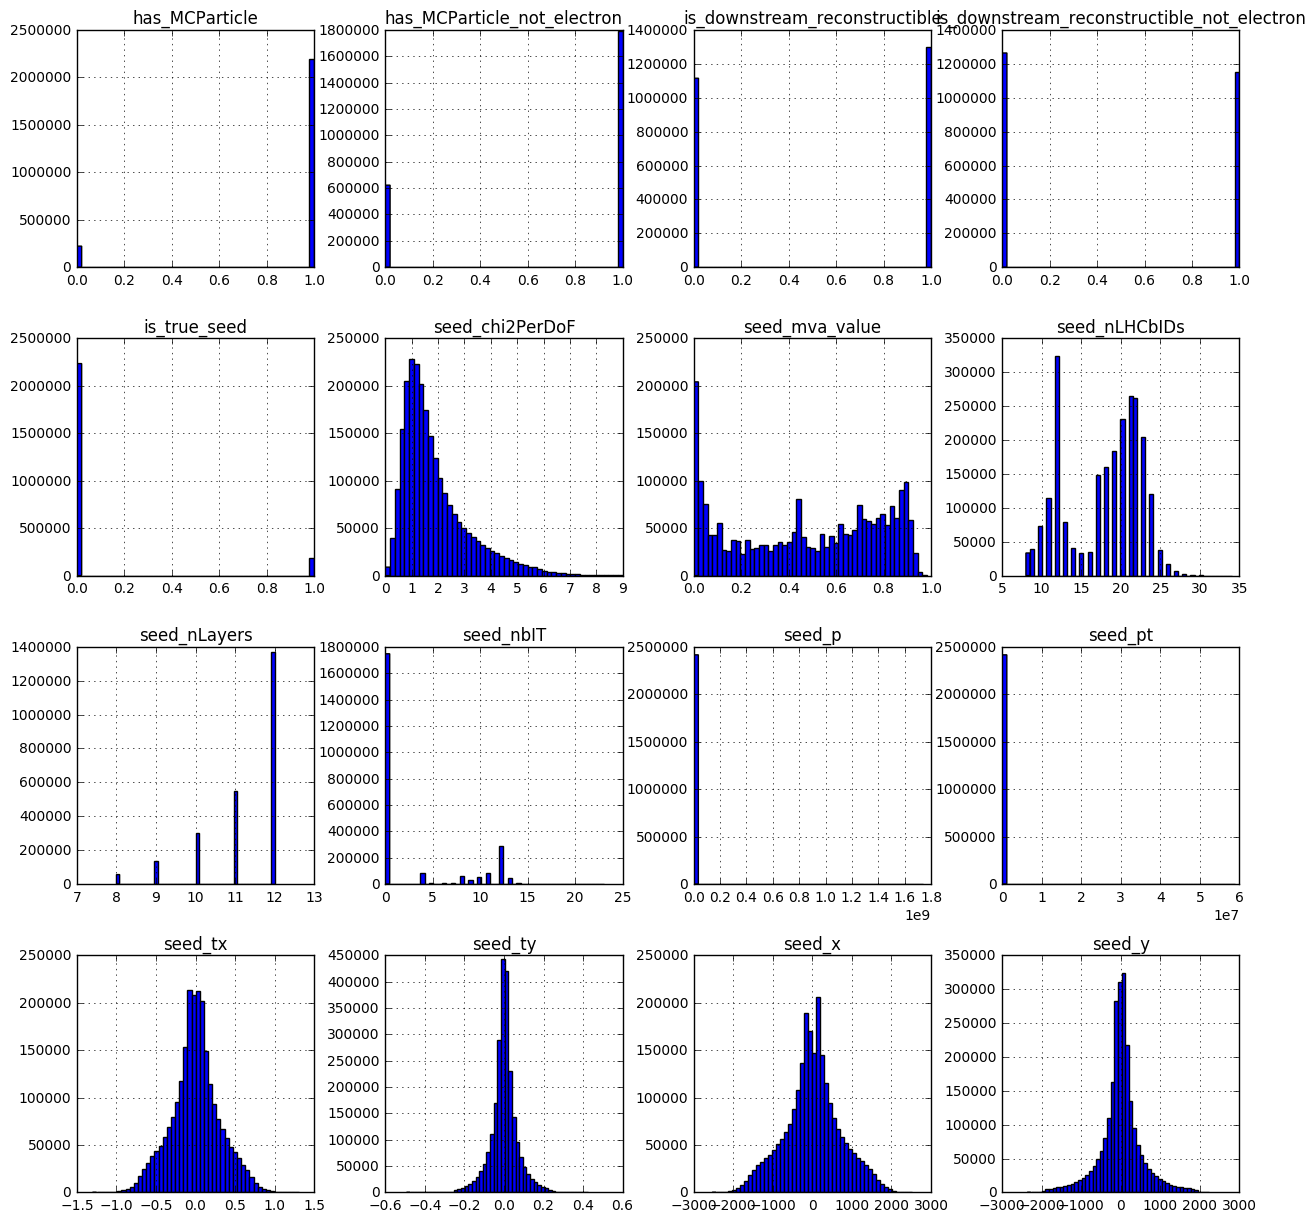

In [21]:
seed_data.hist(bins=50, figsize=(15,15))

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
train_set, test_set = train_test_split(seed_data, test_size=0.3, random_state=42)
test_set.head()

,has_MCParticle,is_downstream_reconstructible,has_MCParticle_not_electron,is_downstream_reconstructible_not_electron,is_true_seed,seed_chi2PerDoF,seed_p,seed_pt,seed_nLHCbIDs,seed_nbIT,seed_nLayers,seed_x,seed_y,seed_tx,seed_ty,seed_mva_value
623302,True,False,False,False,False,1.748657,13907.879268,1100.457939,23,0,12,-255.886796,-143.269671,-0.076126,-0.022471,0.547228
199913,True,True,True,True,False,0.382356,6758.296241,714.254677,15,15,12,-71.204378,144.388506,0.104572,0.018981,0.762580
1726917,True,True,False,False,False,0.856995,6761.049432,1323.215347,21,0,12,-607.927848,-275.155596,-0.196392,-0.035480,0.799577
994153,True,False,True,False,False,0.649232,103980.221573,2113.677291,12,12,12,-49.376129,113.891284,-0.014101,0.014648,0.446092
300320,True,False,True,False,False,1.050288,21617.691107,1449.469949,12,12,12,240.769384,-54.308945,0.066809,-0.007250,0.430011


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2a2265dd8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa2a1e57208>]], dtype=object)

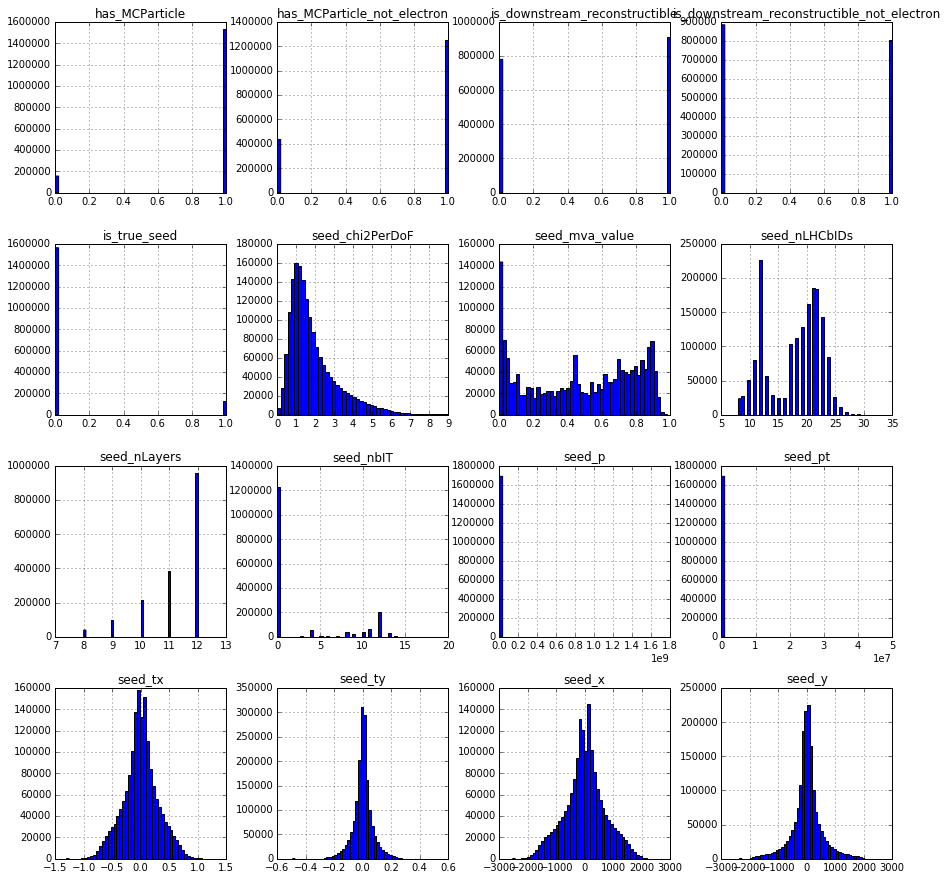

In [24]:
train_set.hist(bins=50, figsize=(15,15))
# plt.savefig("plots/histogram_plots_train_set")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa297c8ccf8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa2976ae320>]], dtype=object)

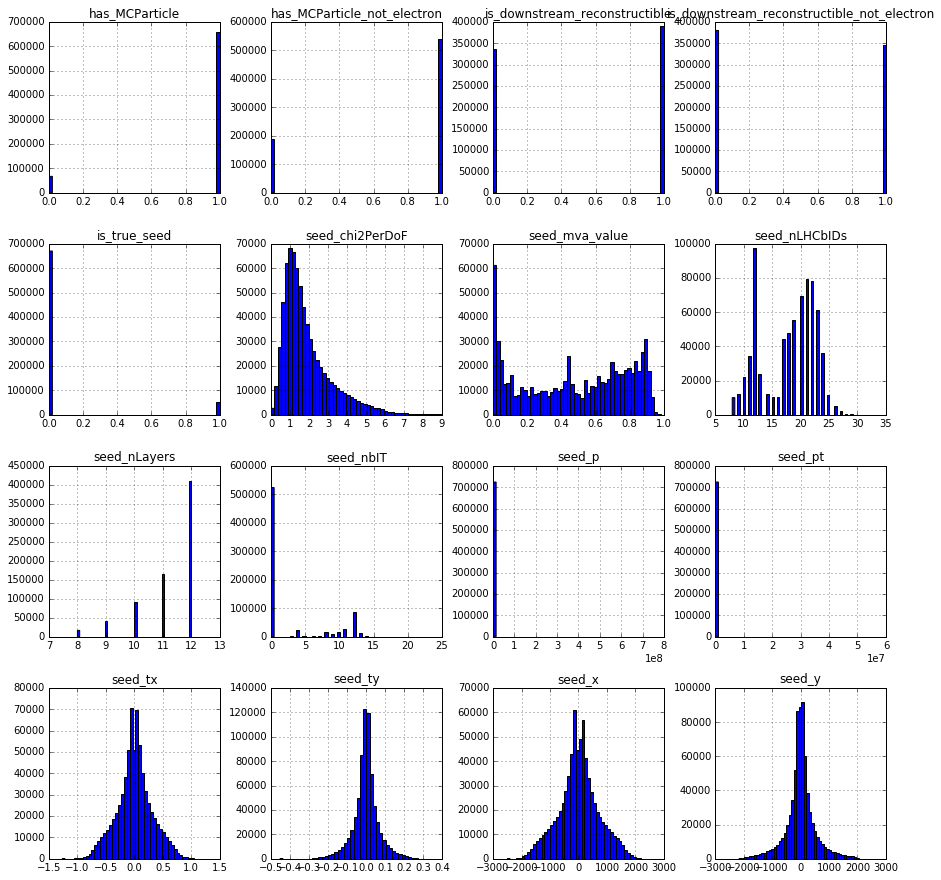

In [26]:
test_set.hist(bins=50, figsize=(15,15))
# plt.savefig("plots/histogram_plots_test_set")

In [28]:
test_set.to_hdf(DATA_DIR + "test_data.h5",'test_set')
train_set.to_hdf(DATA_DIR + "train_data.h5", 'train_set')